# Biostatistics - Week 4

Control for confounding variables relevant to the experiment - paired Dataset 

Preference for paired datasets 


# 7th February 2023

In [1]:
#install.packages("gapminder")
#load the installed package
library(gapminder)
str(gapminder_unfiltered)
str(gapminder)

Warning message:
"package 'gapminder' was built under R version 3.6.3"

Classes 'tbl_df', 'tbl' and 'data.frame':	3313 obs. of  6 variables:
 $ country  : Factor w/ 187 levels "Afghanistan",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ continent: Factor w/ 6 levels "Africa","Americas",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ year     : int  1952 1957 1962 1967 1972 1977 1982 1987 1992 1997 ...
 $ lifeExp  : num  28.8 30.3 32 34 36.1 ...
 $ pop      : int  8425333 9240934 10267083 11537966 13079460 14880372 12881816 13867957 16317921 22227415 ...
 $ gdpPercap: num  779 821 853 836 740 ...
Classes 'tbl_df', 'tbl' and 'data.frame':	1704 obs. of  6 variables:
 $ country  : Factor w/ 142 levels "Afghanistan",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ continent: Factor w/ 5 levels "Africa","Americas",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ year     : int  1952 1957 1962 1967 1972 1977 1982 1987 1992 1997 ...
 $ lifeExp  : num  28.8 30.3 32 34 36.1 ...
 $ pop      : int  8425333 9240934 10267083 11537966 13079460 14880372 12881816 13867957 16317921 22227415 ...
 $ gdpPercap: num  779 821 853 836 740 ...


In [2]:
setwd("C:/Users/VATSALA NEMA/Documents/SEM 8/Biostatistics")#But this will work


In [3]:
summary(gapminder_unfiltered)
#plot(gapminder_unfiltered)

           country        continent         year         lifeExp     
 Czech Republic:  58   Africa  : 637   Min.   :1950   Min.   :23.60  
 Denmark       :  58   Americas: 470   1st Qu.:1967   1st Qu.:58.33  
 Finland       :  58   Asia    : 578   Median :1982   Median :69.61  
 Iceland       :  58   Europe  :1302   Mean   :1980   Mean   :65.24  
 Japan         :  58   FSU     : 139   3rd Qu.:1996   3rd Qu.:73.66  
 Netherlands   :  58   Oceania : 187   Max.   :2007   Max.   :82.67  
 (Other)       :2965                                                 
      pop              gdpPercap       
 Min.   :5.941e+04   Min.   :   241.2  
 1st Qu.:2.680e+06   1st Qu.:  2505.3  
 Median :7.560e+06   Median :  7825.8  
 Mean   :3.177e+07   Mean   : 11313.8  
 3rd Qu.:1.961e+07   3rd Qu.: 17355.8  
 Max.   :1.319e+09   Max.   :113523.1  
                                       

In [4]:
#install.packages("Hmisc")
#load the installed package
#library(Hmisc)

In [5]:
#as.data.frame(unlist(strsplit(unique())))

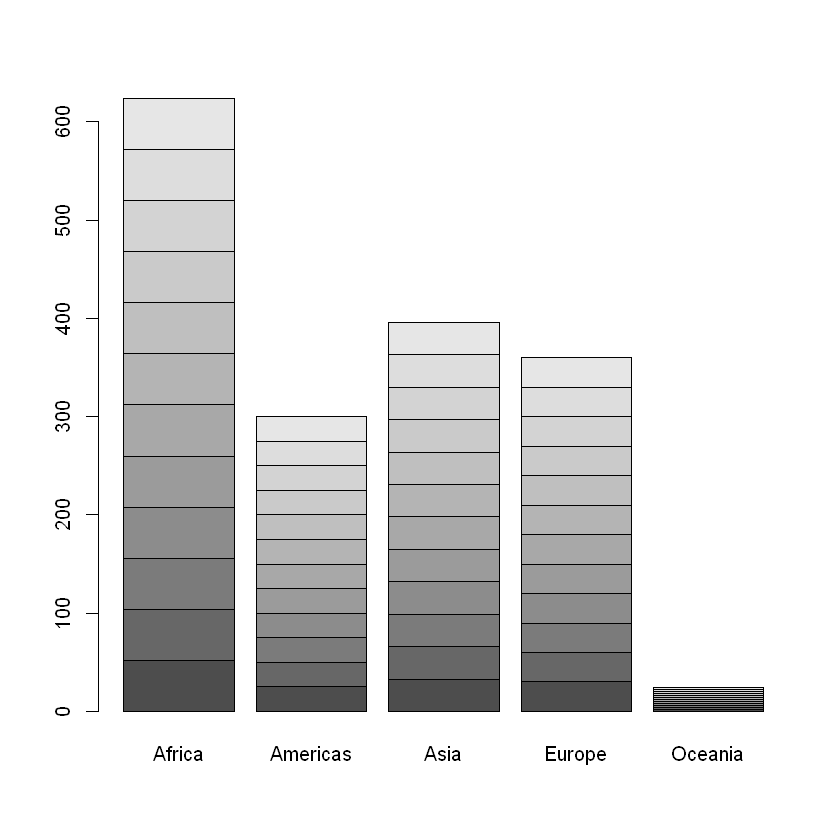

In [6]:
table(gapminder$year, gapminder$continent)-> crossTab
barplot(crossTab)

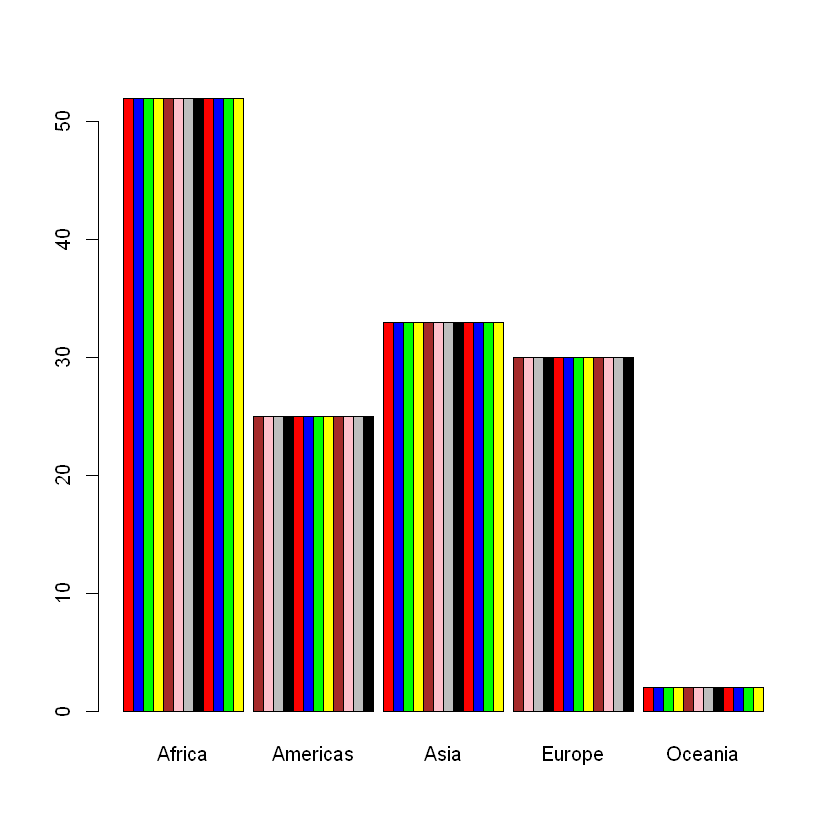

In [7]:
barplot(crossTab,beside=TRUE,col=c("red","blue","green","yellow",
                                   "brown","pink","grey","black"))


In [8]:
# Why is it bad to perform too many tests?
# The p-value turns to creep into the significant value 
# ANOVA, Kruskals test, and - midsem 

In [9]:
#comparing more than 2 vectors ----
x = rnorm(10,sd=100,mean=5)
y = rnorm(10,sd=10,mean=6)
z = rnorm(10,sd=10,mean=7)

data.frame(values=c(x,y,z)
           ,variable=c(rep("x",length(x)),rep("y",length(y)),
                       rep("z",length(z))))->xyzBox


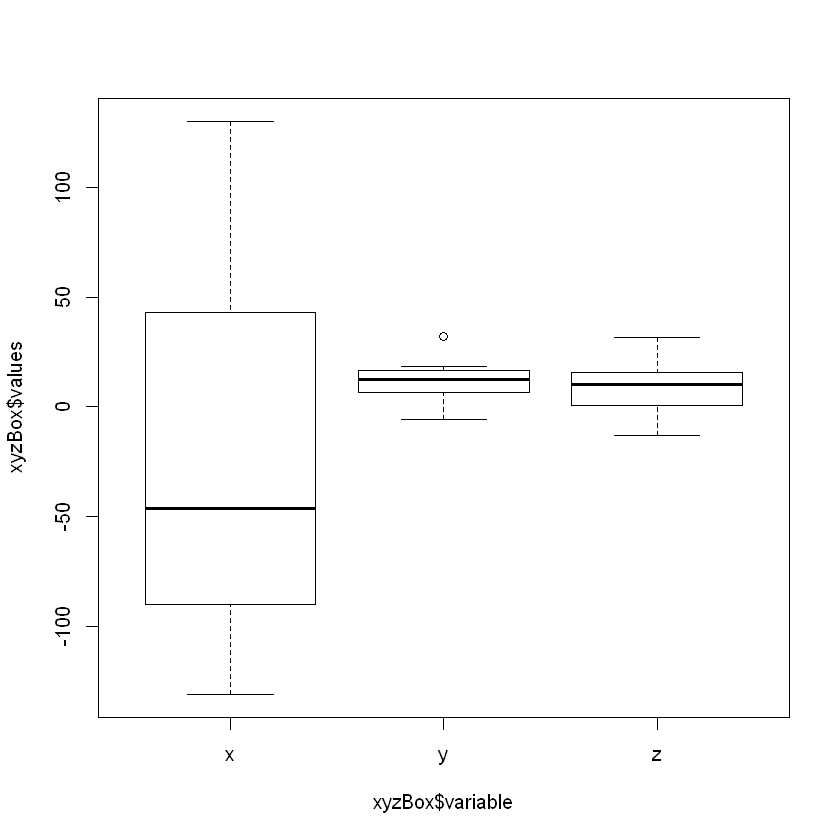

In [10]:
boxplot(xyzBox$values~xyzBox$variable)

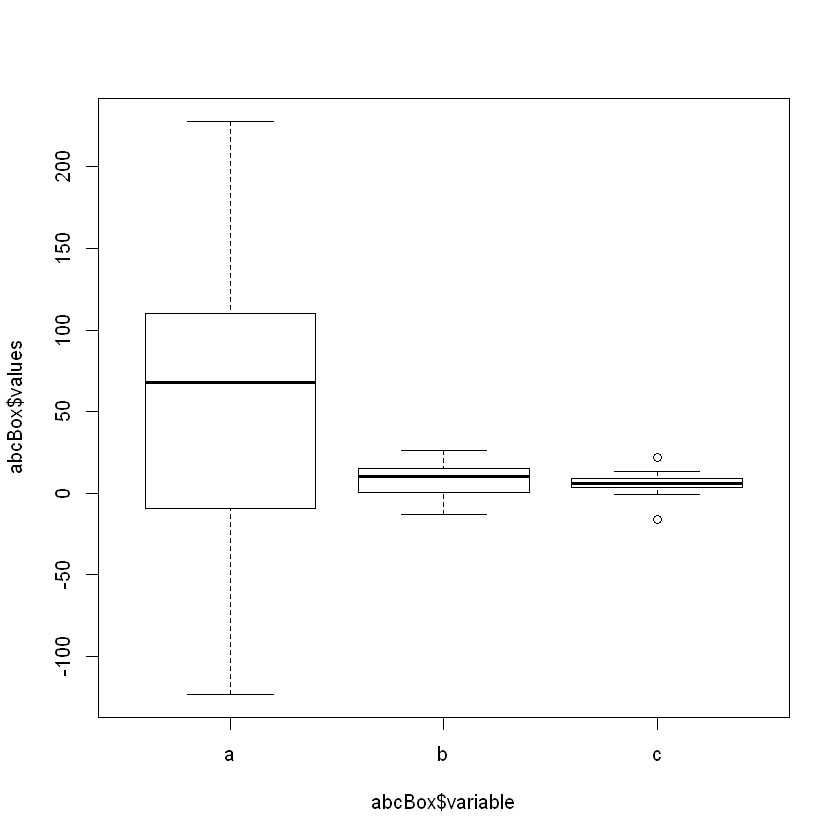

In [11]:
a = rnorm(10,sd=100,mean=50)
b = rnorm(10,sd=10,mean=6)
c = rnorm(10,sd=10,mean=7)

data.frame(values=c(a,b,c)
           ,variable=c(rep("a",length(a)),rep("b",length(b)),
                       rep("c",length(c))))->abcBox

boxplot(abcBox$values~abcBox$variable)

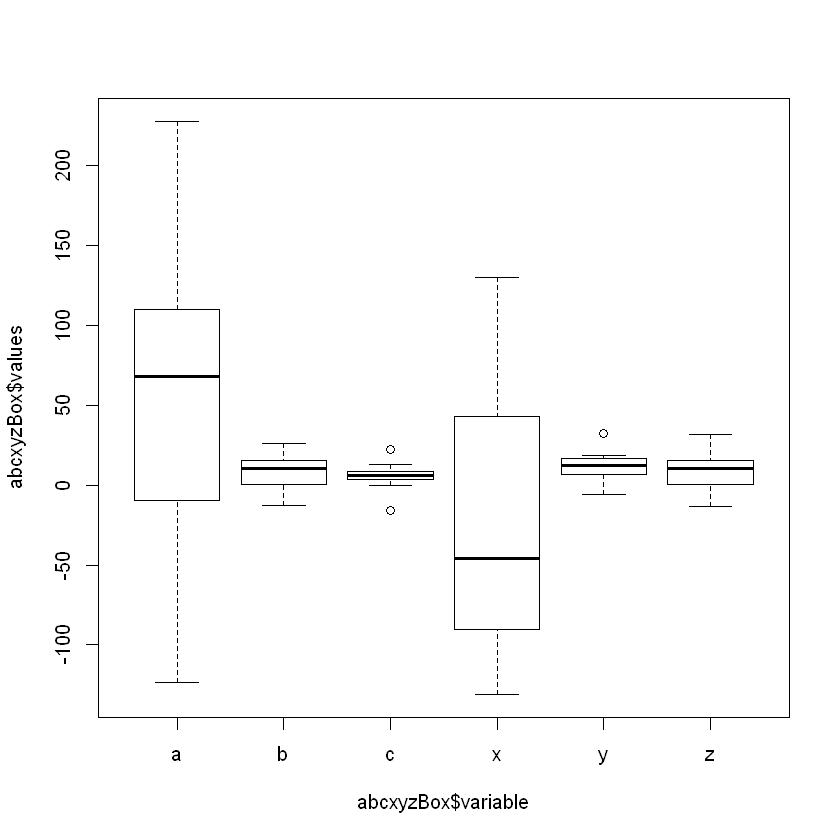

In [12]:
#rbind will append the rows
rbind(abcBox,xyzBox)->abcxyzBox
boxplot(abcxyzBox$values~abcxyzBox$variable)

In [14]:
#One way ANOVA
res.aov1 <- aov(values ~ variable, data=abcxyzBox)
#Null hypothesis: All groups have same mean
res.aov1


Call:
   aov(formula = values ~ variable, data = abcxyzBox)

Terms:
                 variable Residuals
Sum of Squares   28851.45 162487.94
Deg. of Freedom         5        54

Residual standard error: 54.85468
Estimated effects may be unbalanced

In [16]:
summary(res.aov1)

            Df Sum Sq Mean Sq F value Pr(>F)
variable     5  28851    5770   1.918  0.106
Residuals   54 162488    3009               

In [17]:
#Alternative hypothesis:All groups don't have the same mean

res.aov2 <- aov(values ~ variable, data = xyzBox)
res.aov2


Call:
   aov(formula = values ~ variable, data = xyzBox)

Terms:
                variable Residuals
Sum of Squares   7990.83  65683.06
Deg. of Freedom        2        27

Residual standard error: 49.32247
Estimated effects may be unbalanced

In [18]:
summary(res.aov2)


            Df Sum Sq Mean Sq F value Pr(>F)
variable     2   7991    3995   1.642  0.212
Residuals   27  65683    2433               

In [19]:
res.aov0<- aov(values ~ variable, data=abcBox)
TukeyHSD(res.aov0) # for multiple testing correction p value is adjusted

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = values ~ variable, data = abcBox)

$variable
         diff        lwr      upr     p adj
b-a -42.56331 -108.95770 23.83109 0.2673293
c-a -45.69114 -112.08553 20.70326 0.2212427
c-b  -3.12783  -69.52223 63.26657 0.9925085


In [ ]:
#Quantile -Quantile Plot

#Homogeneity of variances: Data from multiple groups have the same 

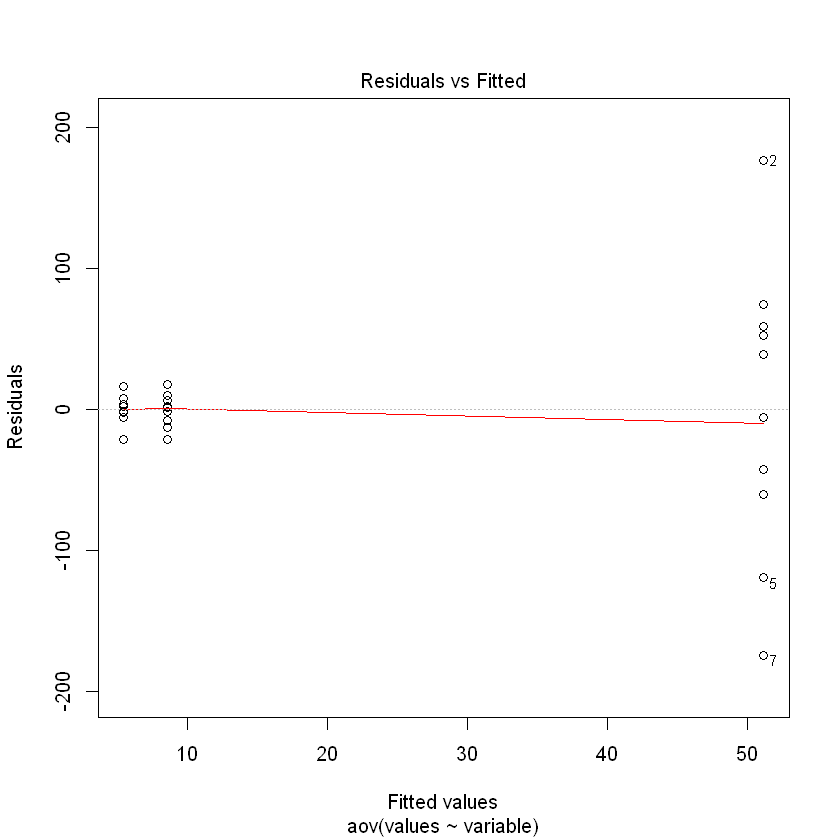

In [20]:
plot(res.aov0, 1)

In [22]:
#Pairwise TukeyHSD ----
TukeyHSD(res.aov1)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = values ~ variable, data = abcxyzBox)

$variable
            diff        lwr        upr     p adj
b-a -42.56330510 -115.04189  29.915278 0.5153926
c-a -45.69113536 -118.16972  26.787448 0.4358384
x-a -75.25094222 -147.72953  -2.772359 0.0375296
y-a -38.95483405 -111.43342  33.523749 0.6098716
z-a -42.59190275 -115.07049  29.886680 0.5146499
c-b  -3.12783026  -75.60641  69.350753 0.9999950
x-b -32.68763712 -105.16622  39.790946 0.7658160
y-b   3.60847105  -68.87011  76.087054 0.9999898
z-b  -0.02859764  -72.50718  72.449985 1.0000000
x-c -29.55980686 -102.03839  42.918776 0.8325425
y-c   6.73630131  -65.74228  79.214884 0.9997765
z-c   3.09923261  -69.37935  75.577816 0.9999952
y-x  36.29610817  -36.18247 108.774691 0.6784706
z-x  32.65903948  -39.81954 105.137623 0.7664693
z-y  -3.63706870  -76.11565  68.841514 0.9999894


In [ ]:
#install.packages("car")
library(car)

In [ ]:
#leveneTest(values~variable, data=abcBox) #to see if the variances are equal 

In [ ]:
plot(res.aov0, 2)

In [ ]:
#qqplot(values ~ variable, data=abcBox)

In [ ]:
#Non parametric equivalent of ANOVA -kruskals value test 

# Week 5 | 16th February 2023

***Midsem imp stuff***

ANOVA (Parametric)
1. Continuous 
2. Categorical 

Post hoc test: 
1. Tukey HSD
2. Pair t-test 

Non parametric - Kruskal walis test **Question**
1. Pair wilcox - for each pair of categorical variables
2. Dunn test 
3. PMCMR
4. Conover 

Correction tests: 
**Question**
1. FDR
2. Bonferroni 
3. Holm 
4. bh 




In [ ]:
install.packages("dunn.test")

In [ ]:
library(dunn.test)

In [ ]:
#Pairwise multiple comparision of mean ranks (PMCMR)

install.packages("PMCMRplus")
library(PMCMRplus)

In [ ]:
#Conover-Iman test of multiple comparisions using rank sums, p-values 
#F-test(var.test used for checking whether variances are equal)

## **Linear Regression** ##
<br />
y=mx+c
<br />
Intercept: H0=>c=0
<br />
For slope: H-0: m=0



In [ ]:
LunchAmount<-c(300, 154, 72, 899,1234, 36, 764, 321, 540, 684)
TipAmount<-c(30, 15, 7, 89, 123, 3, 76, 32, 54, 68)


In [ ]:
reg_model<-lm(TipAmount~LunchAmount)

In [ ]:
plot(TipAmount~LunchAmount, data=faithful) + abline(lm(TipAmount~LunchAmount, data=faithful), col="blue")

In [ ]:
summary(reg_model)

In [ ]:
a<-data.frame(newdata=394)

In [ ]:
RestaurantClass<_c(2, 1, 1, 3, 4, 1, 2, 1, 2, 2)
reg_model2 <- lm(TipAmount~LunchAmount+RestaurantClass)
abline()

In [ ]:
reg_model3<-lm(TipAmount~LunchAmount*RestaurantClass) #m1*m2=0 

In [ ]:
#AIC - Akaike information criterion
AIC(reg_model1)
AIC(reg_model2)
AIC(reg_model3)